In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
cnx = sqlite3.connect('C:\\Users\\Sujina\\Downloads\\database.sqlite')


In [3]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'],axis=1,inplace=True)

In [6]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df.isnull().any()

overall_rating         True
potential              True
preferred_foot         True
attacking_work_rate    True
defensive_work_rate    True
crossing               True
finishing              True
heading_accuracy       True
short_passing          True
volleys                True
dribbling              True
curve                  True
free_kick_accuracy     True
long_passing           True
ball_control           True
acceleration           True
sprint_speed           True
agility                True
reactions              True
balance                True
shot_power             True
jumping                True
stamina                True
strength               True
long_shots             True
aggression             True
interceptions          True
positioning            True
vision                 True
penalties              True
marking                True
standing_tackle        True
sliding_tackle         True
gk_diving              True
gk_handling            True
gk_kicking          

In [8]:
df = df[~df.overall_rating.isnull()]

In [9]:

#check again for null values #check  

df.isnull().any()

overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate     True
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                 True
dribbling              False
curve                   True
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                 True
reactions              False
balance                 True
shot_power             False
jumping                 True
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                  True
penalties              False
marking                False
standing_tackle        False
sliding_tackle          True
gk_diving              False
gk_handling   

In [10]:
# replace NANs with series means

df["volleys"].fillna(df["volleys"].mean(),inplace=True)
df["curve"].fillna(df["curve"].mean(),inplace=True)
df["agility"].fillna(df["agility"].mean(),inplace=True)
df["balance"].fillna(df["balance"].mean(),inplace=True)
df["jumping"].fillna(df["jumping"].mean(),inplace=True)
df["vision"].fillna(df["vision"].mean(),inplace=True)
df["sliding_tackle"].fillna(df["sliding_tackle"].mean(),inplace=True)

In [11]:

df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [12]:
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('_0','0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('ormal','5')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('o','0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('l0w','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('0','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('1','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('2','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('3','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('4','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('5','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('6','medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('7','high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('8','high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('9','high')

In [13]:
df = df[(df.defensive_work_rate == 'medium') | (df.defensive_work_rate == 'high') | (df.defensive_work_rate == 'low')]

In [14]:
df.defensive_work_rate.value_counts()

medium    131741
high       27488
low        23614
Name: defensive_work_rate, dtype: int64

In [15]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
Name: attacking_work_rate, dtype: int64

In [16]:
# Change "norm" to "medium" and drop the rest having "None" and "Null" values.

df['attacking_work_rate'] = df['attacking_work_rate'].str.replace('norm','medium')
df = df[(df.attacking_work_rate == 'medium') | (df.attacking_work_rate == 'high') | (df.attacking_work_rate == 'low')]

In [17]:
df['attacking_work_rate'] = df['attacking_work_rate'].map({'low': 0, 'medium': 1, 'high': 2}).astype(int)
df['defensive_work_rate'] = df['defensive_work_rate'].map({'low': 0, 'medium': 1, 'high': 2}).astype(int)
df['preferred_foot'] = df['preferred_foot'].map({'left': 0, 'right': 1}).astype(int)

In [18]:
df.describe()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,...,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000,176810.000000
mean,68.676953,73.509507,0.755879,1.193733,1.047548,55.212765,50.046700,57.263990,62.539477,49.575072,...,57.891353,54.946875,46.726746,50.338635,48.022228,14.702223,15.890153,20.288688,15.960732,16.271845
std,7.031121,6.584915,0.429566,0.503121,0.505663,17.251871,19.028715,16.484608,14.175661,18.255857,...,15.155479,15.549558,21.235230,21.512153,21.610660,16.839847,15.839940,20.978388,16.067850,17.192270
min,33.000000,39.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,1.000000,1.000000,1.000000,45.000000,34.000000,49.000000,57.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,1.000000,1.000000,1.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,1.000000,1.000000,1.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,1.000000,2.000000,2.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


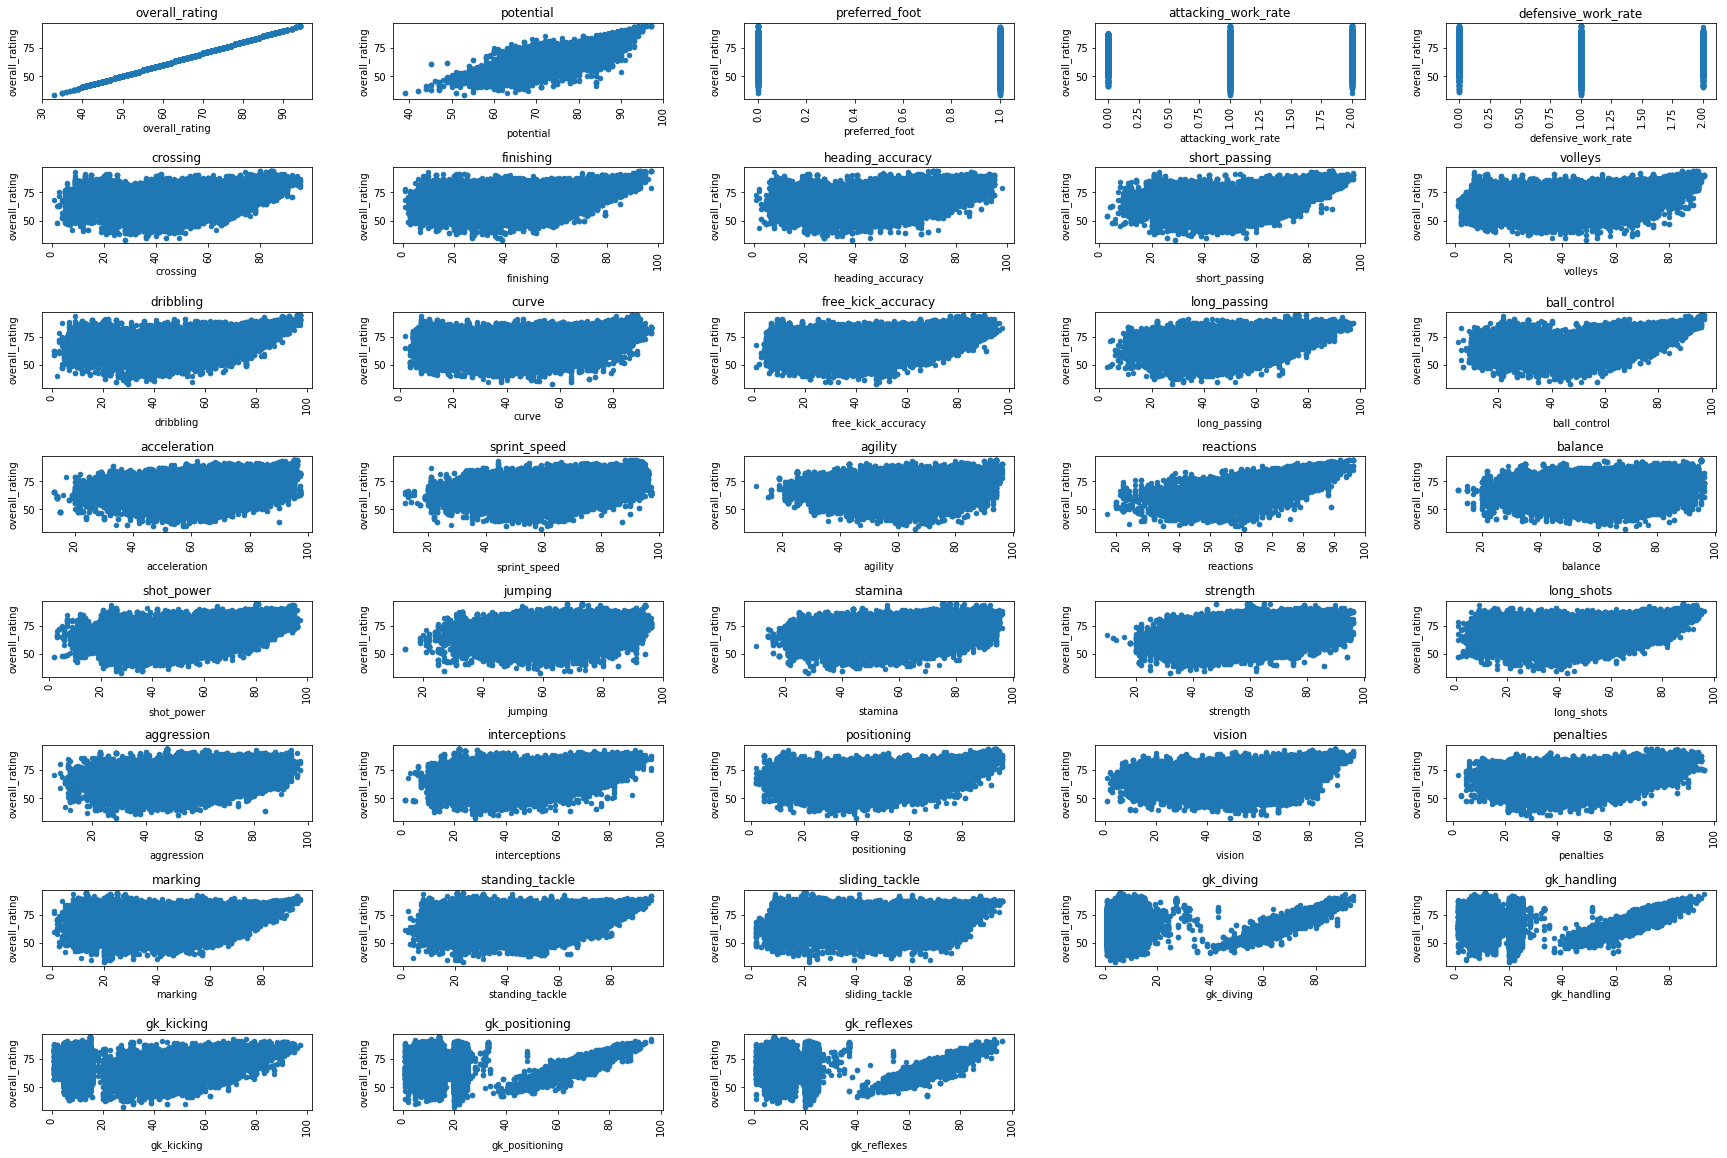

In [22]:
from math import ceil
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(30,20))
cols = 5
rows = ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    axs = fig.add_subplot(rows, cols, i + 1)
    axs.set_title(column)
    df.plot(kind='scatter', x=column, y='overall_rating', ax=axs)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.9, wspace=0.3)

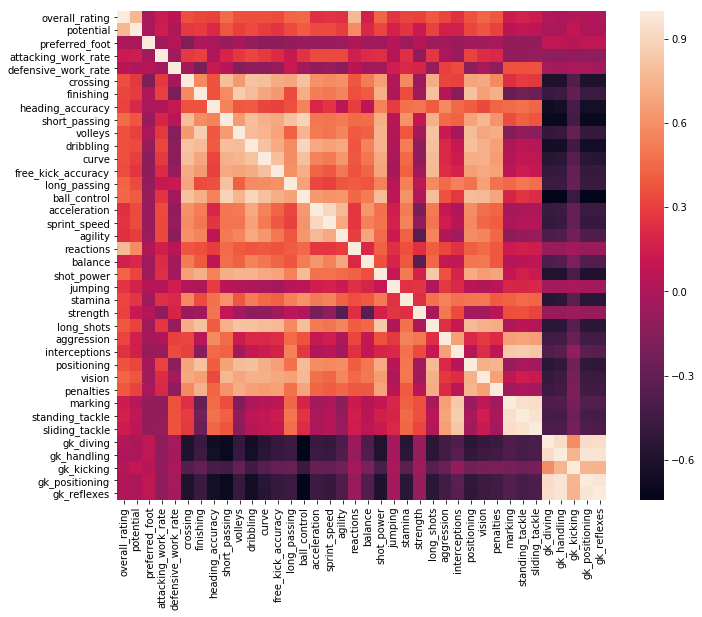

In [24]:
import seaborn as sns
fig = plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), square=True)
plt.show()

In [25]:
X = df[['potential', 'preferred_foot', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle',
       'attacking_work_rate', 'defensive_work_rate']]

In [26]:
y = df["overall_rating"]

# Linear regression


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:

predicted = lm.predict(X_test)
print ("Test Accuracy:", round(metrics.r2_score(y_test, predicted) * 100, 2), '%')
print ("Mean Squared Error:", round(mean_squared_error(y_test, predicted),5))

Test Accuracy: 79.2 %
Mean Squared Error: 10.33402


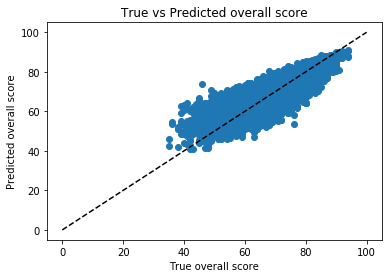

In [35]:
plt.scatter(y_test, predicted)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel("True overall score")
plt.ylabel("Predicted overall score")
plt.title("True vs Predicted overall score")
plt.show()

# Decision tree regressor

In [37]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale the features
X_scaler = StandardScaler()
X_train = pd.DataFrame(X_scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(X_scaler.fit_transform(X_test), columns=X_test.columns)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
y_test = y_scaler.transform(y_test[:, None])[:, 0]

dtmodel =DecisionTreeRegressor()
dtmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
predicted = dtmodel.predict(X_test)
print ("Test Accuracy:", round(metrics.r2_score(y_test, predicted) * 100, 2), '%')
print ("Mean Squared Error:", round(mean_squared_error(y_test, predicted),5))

Test Accuracy: 94.94 %
Mean Squared Error: 0.05096


Accuracy is significantly higher and MSE is significantly lower than the linear model. 